# MY PROJECT :
# Big Mart Sales Analysis
![title](https://thumbs.dreamstime.com/t/customer-shopping-supermarket-trolley-shift-motion-time-lapse-speed-up-50682151.jpg)

### INTRODUCTION
This is a project on the analysis of the sales of the products in Big Mart. This dataset contains the sales in four types of stores, Supermarket type 1, 2 and 3, and Grocery stores.

The sales of these products depends on various factors and some data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities to relate these various factors. Also, certain attributes of each product and store have been defined in the dataset.

This project aims to build a predictive model and find out the sales of each product at a particular store.

### ADVANTAGES
Using this project, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

#### Now, We will follow a sequential or stepby step process to get the efficient outcome of this project which includes the following steps :
1. Getting the data
2. Data preprocessing
3. EDA on the data to get a good idea of each trends.
4. Feature Engineering
5. Training the model
6. Evaluation of the model

# (1)
# Importing some Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statistics
from scipy.stats import mode

## Importing the dataset through csv File

In [2]:
data = pd.read_csv("Big_mart.csv")

## Size and Shape of the dataset

In [3]:
print('Size of the dataset is :')
data.size

Size of the dataset is :


102276

In [4]:
print('Shape of the dataset :')
data.shape

Shape of the dataset :


(8523, 12)

## Information of the Attributes in the dataset
![title](https://ask.qcloudimg.com/http-save/yehe-1314998/biomwioypq.jpeg?imageView2/2/w/1620)

## Let's check the first five rows in the dataset

In [5]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### There are some missing values present at the attributes Item_Weight ,Outlet_Size. 

# (2) Data Preprocessing

## Removing the Null Values

In [8]:
value = data.groupby(['Item_Identifier'])['Item_Weight'].mean()

In [9]:
data.loc[data['Item_Weight'].isnull(),'Item_Weight']=data.loc[data['Item_Weight'].isnull(),'Item_Identifier'].apply(lambda x:value[x])

In [10]:
data[data['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [11]:
data.drop([927,1922,4187,5022],inplace=True)

In [12]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
data.loc[data['Outlet_Size'].isnull(),'Outlet_Size']='missing'

In [14]:
values=data.groupby(['Item_Identifier'])['Outlet_Size'].apply(lambda x:mode(x).mode[0])

C:\Users\Dathu\Anaconda3\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [15]:
values=data.groupby(['Outlet_Type'])['Outlet_Size'].apply(lambda x:mode(x).mode[0])

C:\Users\Dathu\Anaconda3\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [16]:
data.loc[data['Outlet_Size']=='missing','Outlet_Size']=data.loc[data['Outlet_Size']=='missing','Outlet_Type'].apply(lambda x:values[x])

In [17]:
values

Outlet_Type
Grocery Store        missing
Supermarket Type1      Small
Supermarket Type2     Medium
Supermarket Type3     Medium
Name: Outlet_Size, dtype: object

In [18]:
data['Outlet_Size'].head(20)

0      Medium
1      Medium
2      Medium
3     missing
4        High
5      Medium
6        High
7      Medium
8       Small
9       Small
10     Medium
11      Small
12     Medium
13      Small
14       High
15      Small
16     Medium
17     Medium
18     Medium
19      Small
Name: Outlet_Size, dtype: object

In [19]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Null value's are Removed.

In [20]:
data['Item_Fat_Content'].value_counts()

Low Fat    5088
Regular    2886
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

### The problem arises over here due to miscoding of data (i.e, in Naming the Variable's)
### So, let us get a solution for this type of error's

In [21]:
data.loc[(data['Item_Fat_Content']=="LF") | (data['Item_Fat_Content']=='low fat') ,'Item_Fat_Content']="Low Fat"
data.loc[(data['Item_Fat_Content']=="reg"),'Item_Fat_Content']="Regular"

In [22]:
print(data['Item_Fat_Content'].unique())

['Low Fat' 'Regular']


In [23]:
print(data['Item_Type'].unique())

['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8519 non-null object
Item_Weight                  8519 non-null float64
Item_Fat_Content             8519 non-null object
Item_Visibility              8519 non-null float64
Item_Type                    8519 non-null object
Item_MRP                     8519 non-null float64
Outlet_Identifier            8519 non-null object
Outlet_Establishment_Year    8519 non-null int64
Outlet_Size                  8519 non-null object
Outlet_Location_Type         8519 non-null object
Outlet_Type                  8519 non-null object
Item_Outlet_Sales            8519 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.2+ KB


# (3) Exploratory Data Analysis (EDA) on the dataset :

## Univariate Analysis :

### Countplot for Item_Fat_Content

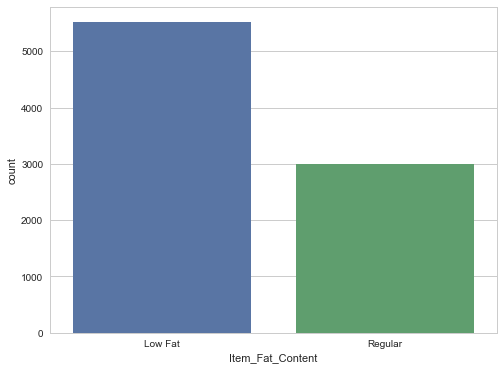

In [25]:
plt.figure(figsize=(8,6))
sns.set(style='whitegrid',color_codes=True)
sns.countplot(x=data['Item_Fat_Content']);
sns.despine;

### From the above plot most of the items at the Big Mart have Low Fat content in them than the Regular content.

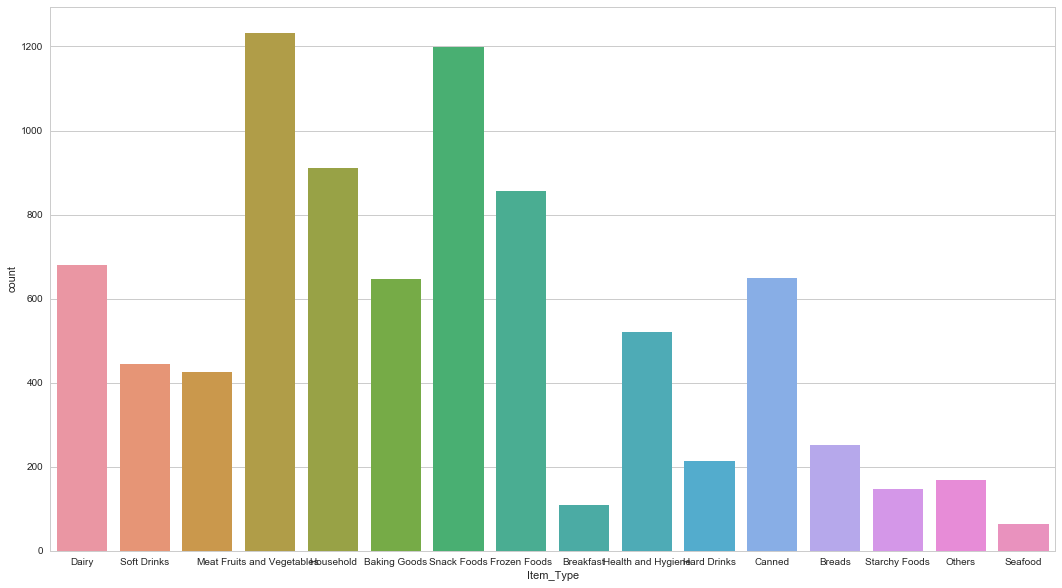

In [26]:
plt.figure(figsize=(18,10))
sns.set(style='whitegrid',color_codes=True)
sns.countplot(data['Item_Type'])

### From the above plot we can refer that the highly solded items in the Big Mart are Fruits and Vegetables.

### Distribution plot for Item_Weight

C:\Users\Dathu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Dathu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


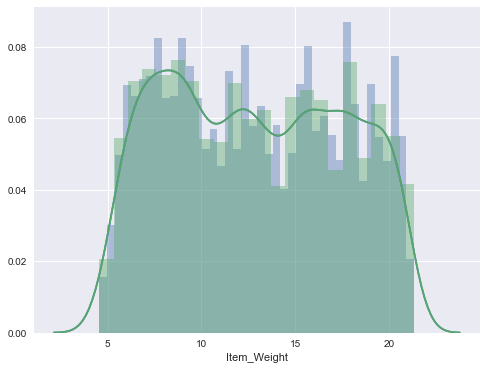

In [27]:
plt.figure(figsize=(8,6))
sns.set_style('darkgrid')
sns.distplot(data['Item_Weight'],bins=40)
sns.distplot(data['Item_Weight'])

### Distribution plot : Item_visibility

C:\Users\Dathu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


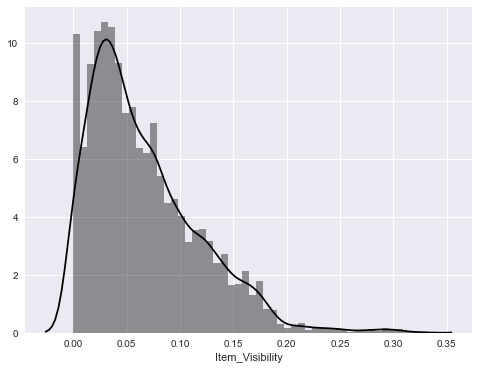

In [28]:
plt.figure(figsize=(8,6))
sns.distplot(data['Item_Visibility'], color='black');
sns.despine;

### from the above plot mostly the value of Item_Visibility is near to 0.

C:\Users\Dathu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


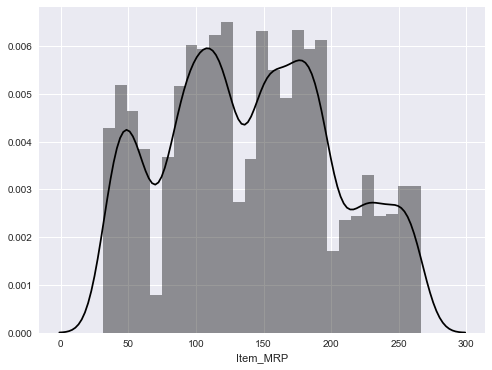

In [29]:
plt.figure(figsize=(8,6))
sns.set_style('darkgrid')
sns.distplot(data['Item_MRP'], color='black');
sns.despine;

### From the above distribution plot we can say that most of the items having Price in Medium or High category.
### Small number of Items are present at the category where the price is very high in range.

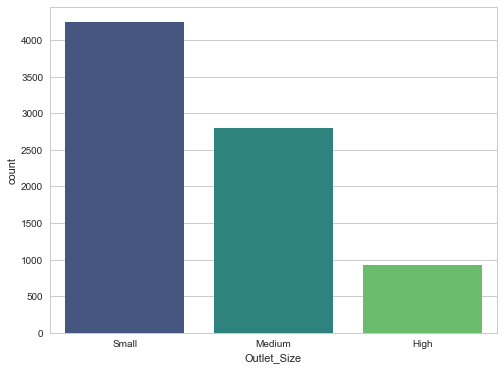

In [30]:
plt.figure(figsize=(8,6))
sns.set(style='whitegrid',color_codes=True)
sns.countplot(x='Outlet_Size', data=data, palette="viridis", order=['Small', 'Medium', 'High']);
sns.despine;

### From the above plot  we can basically figure the three points , they are:
1. Most of the stores are small in size.
2. Medium outlet size stores are small in number.
3. Stores in the Higher outlet size are very less in number.

### Countplot : Outlet_Type

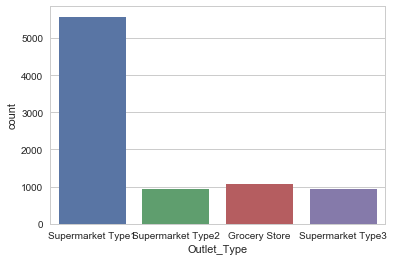

In [31]:
sns.set(style='whitegrid',color_codes=True)
sns.countplot(data['Outlet_Type'])

### From the above countplot we can say that , most of the shops are of Supermarket Type1.

## Bivariate and Multivariate Analysis :

In [32]:
data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.009173,0.025975,-0.013426,0.013168
Item_Visibility,-0.009173,1.000000,-0.001155,-0.074325,-0.128297
Item_MRP,0.025975,-0.001155,1.000000,0.004599,0.567803
Outlet_Establishment_Year,-0.013426,-0.074325,0.004599,1.000000,-0.049083
Item_Outlet_Sales,0.013168,-0.128297,0.567803,-0.049083,1.000000


### Let us see the corelation between various attributes in the dataset using heatmap which is given below :

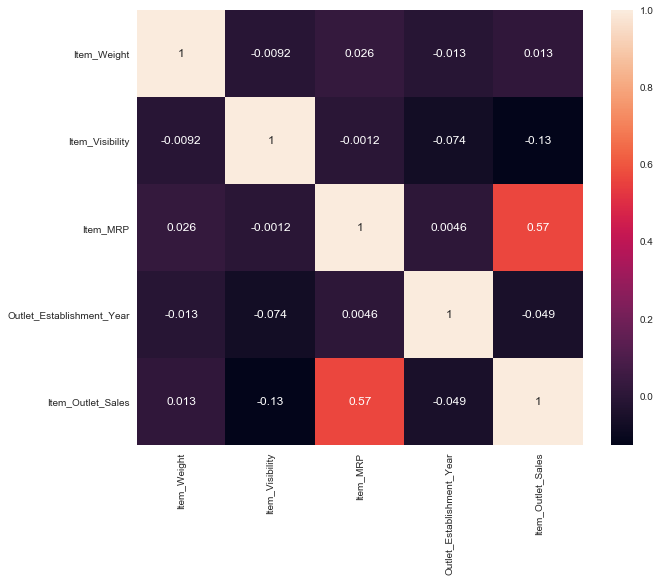

In [33]:
plt.figure(figsize=(10,8));
sns.heatmap(data.corr(),annot=True);

## Weight - Item_Outlet_Sales

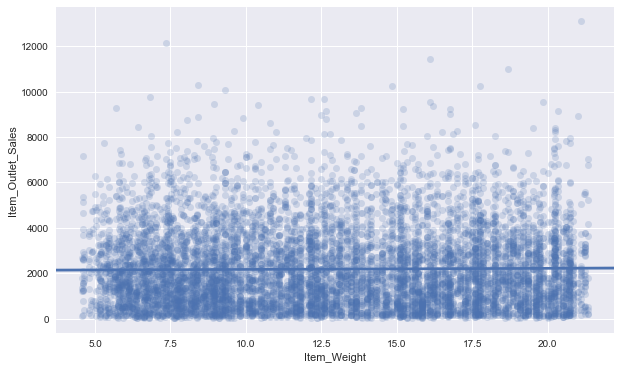

In [34]:
plt.figure(figsize=(10,6))
sns.set(style='darkgrid',color_codes=True)
sns.regplot(x='Item_Weight',y='Item_Outlet_Sales',data=data,scatter_kws={'alpha':0.2})

## MRP - Item_Outlet_Sales

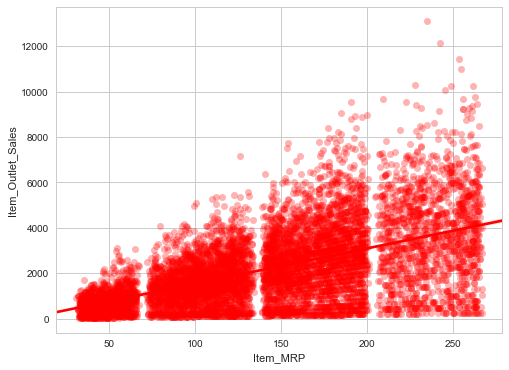

In [35]:
plt.figure(figsize=(8,6));
sns.set_style('whitegrid')
sns.regplot(x='Item_MRP', y='Item_Outlet_Sales', data=data, x_jitter=0.3, scatter_kws={'alpha':0.3}, color='red');

1. MRP and Outlet Sales of the Item are positively correlated with each other and having a correlation coefficient of 0.57.

2. Sales are more for the items which are priced higher as compared to the items which are lower or medicorly priced.

## Item visibilty - Item Outlet sales

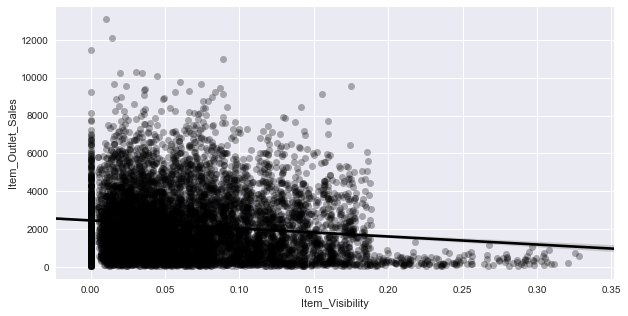

In [36]:
plt.figure(figsize=(10,5))
sns.set(style='darkgrid',color_codes=True)
sns.regplot(x='Item_Visibility', y='Item_Outlet_Sales', data=data, scatter_kws={'alpha':0.3} , color='black')

## Outlet Size  vs  Item Outlet Sale

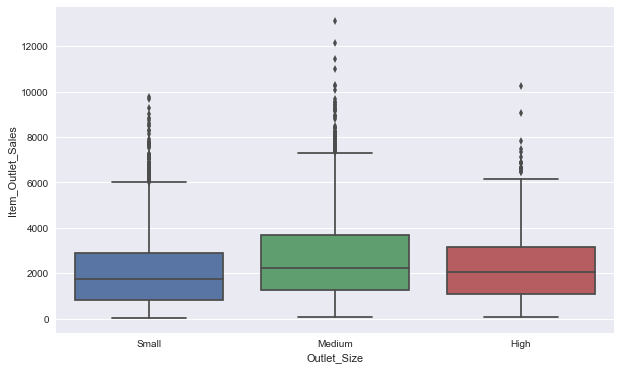

In [37]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=data, order=['Small', 'Medium', 'High']);

## Outlet Establishment Year  vs  Output sales

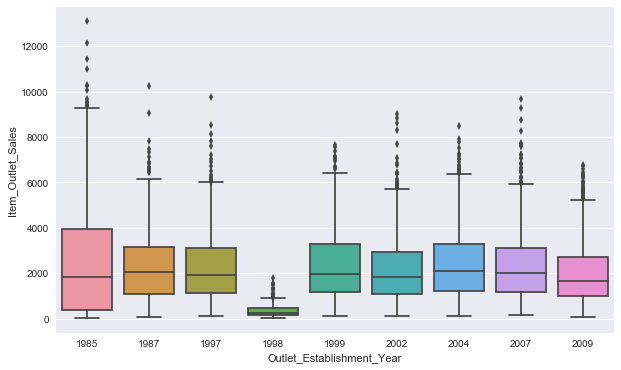

In [38]:
plt.figure(figsize=(10,6))
sns.set(style='darkgrid',color_codes=True)
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=data)

## Outlet Type  -  Item Outlet Sales

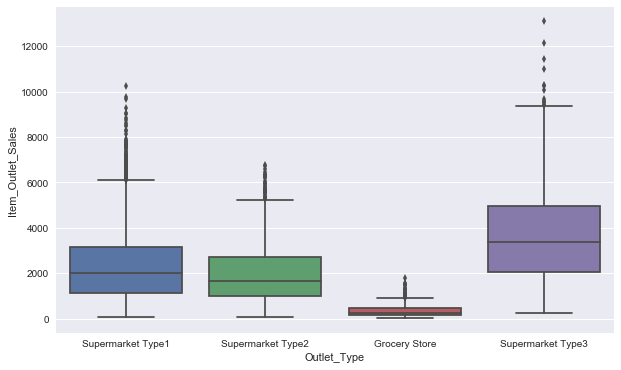

In [39]:
plt.figure(figsize=(10,6))
sns.set(style='darkgrid',color_codes=True)
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',data=data)

### Multivariate for Item Type , Item Outlet Sales and Outlet Type

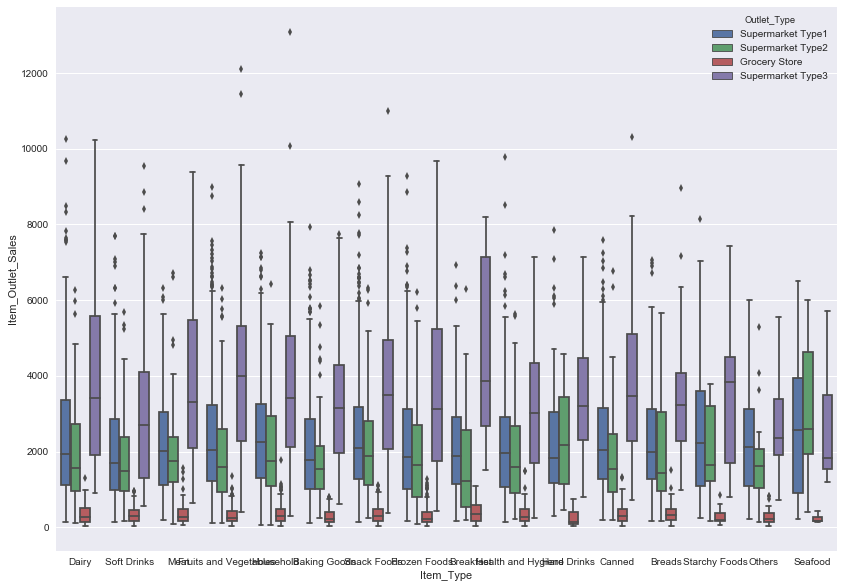

In [40]:
plt.figure(figsize=(14,10))
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=data, hue='Outlet_Type');

# (4) Feature Engineering

In [41]:
data1 = data.copy()
data1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [42]:
data1['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1199
Household                 910
Frozen Foods              855
Dairy                     681
Canned                    649
Baking Goods              647
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

There is totally 16 types of item are there, so lets use the item identifier to categorically arrange these values for easy identification.

In [43]:
data1['Item_Type'] = data1['Item_Identifier'].apply(lambda x: x[0:2])
data1['Item_Type'].head()

0    FD
1    DR
2    FD
3    FD
4    NC
Name: Item_Type, dtype: object

In [44]:
data1['Item_Type'].value_counts()

FD    6121
NC    1599
DR     799
Name: Item_Type, dtype: int64

In [45]:
data1.shape

(8519, 12)

In [46]:
data1.size

102228

In [47]:
data1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,FD,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,DR,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,FD,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,FD,182.0950,OUT010,1998,missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,NC,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [48]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

In [49]:
data1['Item_Type'] = lab_enc.fit_transform(data1['Item_Type'])
data1['Item_Fat_Content'] = lab_enc.fit_transform(data1['Item_Fat_Content'])
data1['Outlet_Type'] = lab_enc.fit_transform(data1['Outlet_Type'])
data1['Outlet_Size'] = lab_enc.fit_transform(data1['Outlet_Size'])
data1['Outlet_Location_Type'] = lab_enc.fit_transform(data1['Outlet_Location_Type'])

In [50]:
data1['Total_Year']=0
data1['Total_Year']=data['Outlet_Establishment_Year'].apply(lambda x: 2013-x)

In [61]:
data1.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Total_Year
0,9.30,0,0.016047,1,249.8092,1,0,1,3735.1380,14
1,5.92,1,0.019278,0,48.2692,1,2,2,443.4228,4
2,17.50,0,0.016760,1,141.6180,1,0,1,2097.2700,14
3,19.20,1,0.000000,1,182.0950,3,2,0,732.3800,15
4,8.93,0,0.000000,2,53.8614,0,2,1,994.7052,26


In [52]:
drp=['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year']
data1.drop(drp,axis=1,inplace=True)

In [62]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8522
Data columns (total 10 columns):
Item_Weight             8519 non-null float64
Item_Fat_Content        8519 non-null int64
Item_Visibility         8519 non-null float64
Item_Type               8519 non-null int64
Item_MRP                8519 non-null float64
Outlet_Size             8519 non-null int64
Outlet_Location_Type    8519 non-null int64
Outlet_Type             8519 non-null int64
Item_Outlet_Sales       8519 non-null float64
Total_Year              8519 non-null int64
dtypes: float64(4), int64(6)
memory usage: 732.1 KB


In [63]:
data1.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Total_Year
0,9.30,0,0.016047,1,249.8092,1,0,1,3735.1380,14
1,5.92,1,0.019278,0,48.2692,1,2,2,443.4228,4
2,17.50,0,0.016760,1,141.6180,1,0,1,2097.2700,14
3,19.20,1,0.000000,1,182.0950,3,2,0,732.3800,15
4,8.93,0,0.000000,2,53.8614,0,2,1,994.7052,26


# (4)
# Splitting the dataset into Train and Test

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error,accuracy_score

In [68]:
X=data1.drop('Item_Outlet_Sales',axis=1)
y=data1['Item_Outlet_Sales']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Regression Evaluation Metrics
Here are three common evaluation metrics for regression problems:

1. Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
2. Mean Squared Error (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
3. Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$
Comparing these metrics:

### MAE is the easiest to understand, because it's the average error.
### MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
### RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
All of these are loss functions, because we want to minimize them

## Building and Training the Linear Regression Model

In [72]:
LR = LinearRegression(normalize=True)
LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

## Prediction and Evaluation of the dataset

In [73]:
predict = LR.predict(X_test)

In [74]:
print('Score is : ')
LR.score(X_test, y_test)

Score is : 


0.5070301415871263

In [76]:
from sklearn import metrics
print('MAE is :' , metrics.mean_absolute_error(y_test, predict))
print('MSE is :' , metrics.mean_squared_error(y_test, predict))
print('RMSE is :' , np.sqrt(metrics.mean_squared_error(y_test, predict)))

MAE is : 888.2891785558816
MSE is : 1420924.4732579903
RMSE is : 1192.0253660295953


# (5) Ensemble Methods :
## (1) GradientBoosting Regressor

In [77]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [78]:
par_grid = {'n_estimators':[10, 50, 100, 150, 500, 1000]}
grd = GridSearchCV(GradientBoostingRegressor(), par_grid)
grd.fit(X_train, y_train)
print(grd.best_params_)

{'n_estimators': 50}


## Building and Training the model :

In [79]:
GBR = GradientBoostingRegressor(n_estimators=50)
GBR.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

## Prediction and Evaluation

In [80]:
GBR_predict = GBR.predict(X_test)

In [81]:
print('Score is :')
GBR.score(X_test, y_test)

Score is :


0.5996816646006257

In [82]:
print('MAE is :' , metrics.mean_absolute_error(y_test, GBR_predict))
print('MSE is :' , metrics.mean_squared_error(y_test, GBR_predict))
print('RMSE is :' , np.sqrt(metrics.mean_squared_error(y_test, GBR_predict)))

MAE is : 749.1077703658684
MSE is : 1153867.9498462765
RMSE is : 1074.1824564971616


## (2) RandomForest Regressor 

In [83]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [85]:
RFR = RandomForestRegressor()

In [89]:
para = {'max_depth':[2,3,4,5,6]}

In [90]:
grid = GridSearchCV(RFR,para)

In [92]:
grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5, 6]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [93]:
grid.best_params_

{'max_depth': 5}

## Building and Training the model :

In [94]:
rfr = RandomForestRegressor(n_estimators=100,max_depth=6)

In [95]:
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

## Prediction and Evaluation

In [96]:
predict = rfr.predict(X_test)

In [97]:
rfr.score(X_test, y_test)

0.5974687941231569

In [98]:
print('MAE is :' , metrics.mean_absolute_error(y_test, predict))
print('MSE is :' , metrics.mean_squared_error(y_test, predict))
print('RMSE is :' , np.sqrt(metrics.mean_squared_error(y_test, predict)))

MAE is : 748.1155480137261
MSE is : 1160246.2745327158
RMSE is : 1077.1472854409076


### After an extensive search for models available under scikit-learn , the Python Machine Learning library, we decided to take one basic Linear Regression model, and two ensemble learners GradientBoosting Regressor and RandomForest Regressor.

Results did not came as expected in case of Linear Regression as we got an accuracy score of 0.568.

But the ensemble learners after tuning them for best parameters using GridSearch performed somewhat well.

### RandomForest Regressor gave an accuracy score of 0.597 with following Error values:

1. MAE is : 748.1155480137261
2. MSE is : 1160246.2745327158
3. RMSE is : 1077.1472854409076

### GradientBoosting Regressor gave an accuracy score 0f 0.599 with following Error values:

1. MAE is : 749.1077703658684
2. MSE is : 1153867.9498462765
3. RMSE is : 1074.1824564971616